# Exercise 1 #
generate a pandas dataframe with a single column for `temperature` to report the daily temperature in a city for a month
write a programme that calculates and prints:
- maximum temperature
- minimum temperature
- mean temperature
- median temperature

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
sns.set_theme(style="darkgrid")

In [132]:
temperatures = np.random.choice(np.arange(0,41),31,replace=True)
db = pd.DataFrame({'temperature':temperatures})

In [133]:
db.head()

,temperature
0,1
1,36
2,13
3,29
4,23


In [134]:
print(f'Maximum temperature: {db['temperature'].max()} °C')
print(f'Minimum temperature: {db['temperature'].min()} °C')
print(f'Mean temperature: {db['temperature'].mean():.2f} °C')
print(f'Median temperature: {db['temperature'].median()} °C')

Maximum temperature: 37 °C
Minimum temperature: 0 °C
Mean temperature: 19.97 °C
Median temperature: 23.0 °C


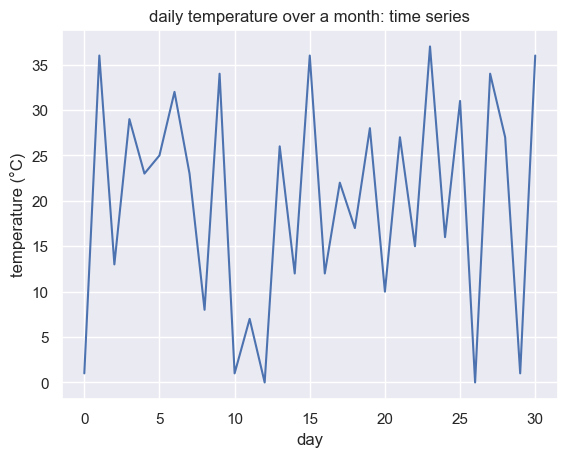

In [135]:
plt.figure()
plt.plot(db.index,db['temperature'])
plt.title('daily temperature over a month: time series')
plt.xlabel('day')
plt.ylabel('temperature (°C)')
plt.show()

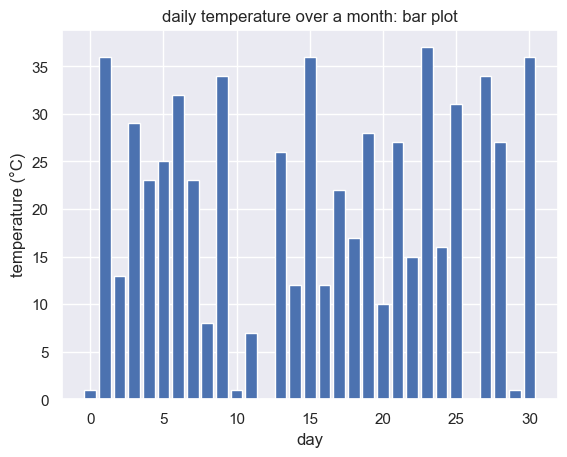

In [136]:
plt.figure()
plt.bar(db.index,db['temperature'])
plt.title('daily temperature over a month: bar plot')
plt.xlabel('day')
plt.ylabel('temperature (°C)')
plt.show()

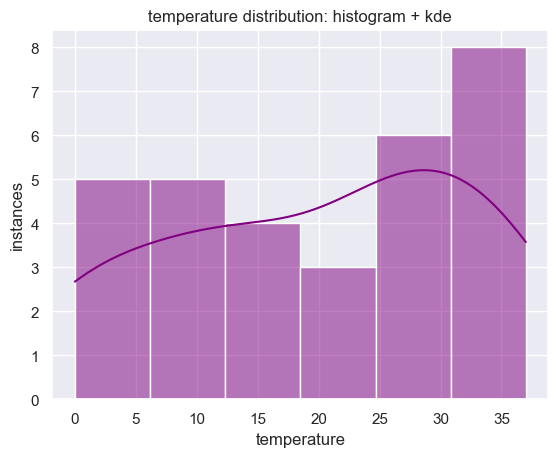

In [137]:
plt.figure()
sns.histplot(db['temperature'],kde=True,color='purple')
plt.title('temperature distribution: histogram + kde')
plt.xlabel('temperature')
plt.ylabel('instances')
plt.show()

Text(0, 0.5, 'temperature (°C)')

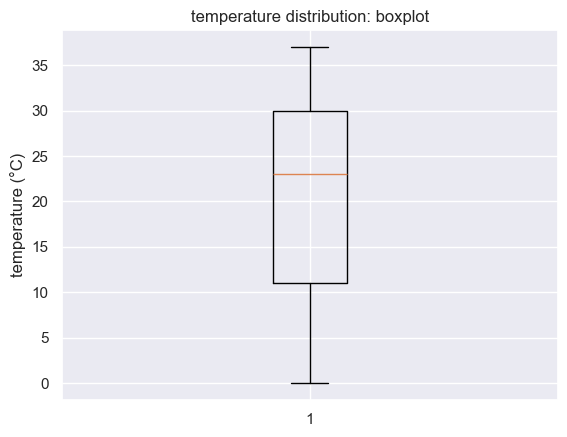

In [138]:
plt.figure()
plt.boxplot(db['temperature'])
plt.title('temperature distribution: boxplot')
plt.ylabel('temperature (°C)')

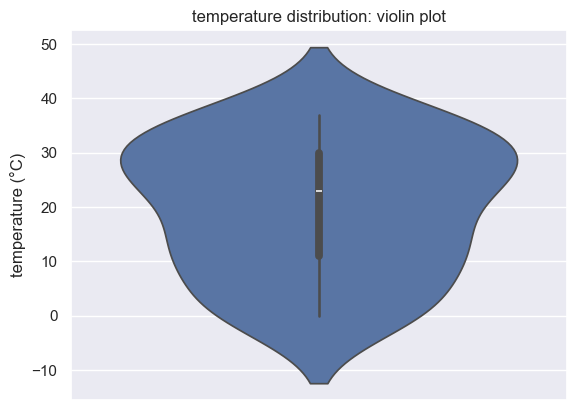

In [139]:
plt.figure()
sns.violinplot(db['temperature'])
plt.title('temperature distribution: violin plot')
plt.ylabel('temperature (°C)')
plt.show()

# Exercise 2 #
- use numpy to generate a time series of 365 days, with data about `visitors`. Include a decreasing trend over time but keep a global mean of 1200 with sd=900.
- create a pandas dataframe with dates as indices, `visitors` as the first column, and a `disease` column sampling from (bone,heart,brain), indicating the most common disease for that day
- calculate the mean visitor number per month, including standard deviation and most/least popular disease
- create a line plot for daily visitors over time; add the moving average over 7 days; create a barplot showing the visitor mean by month; create a plot showcasing disease info

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [141]:
days = 365
mean = 1200
sd = 900
seed = 12345
daily_decline = 0.001

In [142]:
np.random.seed(seed)
base_distribution = np.random.normal(mean, sd, days)
scaling_factors = np.linspace(1,1-daily_decline*(days-1),days)
scaled_distribution = base_distribution*scaling_factors
normal_scaled_distribution = (scaled_distribution-np.mean(scaled_distribution))/np.std(scaled_distribution)
visitor_distribution = np.array([int(i) for i in (mean + normal_scaled_distribution*sd)])

In [143]:
print("Sample mean:",np.mean(visitor_distribution))
print("Sample standard deviation:",np.std(visitor_distribution))

Sample mean: 1199.5835616438355
Sample standard deviation: 899.8497267259042


In [146]:
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
diseases = np.array(('bone','heart','brain'))
rng_diseases = np.random.choice(diseases,days,replace=True)
dictionary = {'visitors': visitor_distribution,'disease':rng_diseases}
dataframe = pd.DataFrame(dictionary, index=dates)
dataframe.head(10)

,visitors,disease
2023-01-01,1265,bone
2023-01-02,1998,bone
2023-01-03,924,bone
2023-01-04,885,brain
2023-01-05,3586,heart
2023-01-06,2970,bone
2023-01-07,1576,brain
2023-01-08,1776,heart
2023-01-09,2294,bone
2023-01-10,2801,heart


In [166]:
months = [0,31,28,31,30,31,30,31,31,30,31,30,31]
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cumsum_months = np.cumsum(months)
monthly_visitor_mean = []
monthly_visitor_sd = []
monthly_most_popular = []
monthly_least_popular = []
for i in range(12):
    section = dataframe.iloc[cumsum_months[i]:cumsum_months[i+1]]
    monthly_visitor_mean.append(section['visitors'].mean())
    monthly_visitor_sd.append(section['visitors'].std())
    monthly_most_popular.append(section['disease'].value_counts(ascending=False).index[0])
    monthly_least_popular.append(section['disease'].value_counts(ascending=False).index[2])  # doesn't take into account that there could be only instances of one disease
for i in range(12):
    print(f"Month: {month_names[i]}, visitor mean: {monthly_visitor_mean[i]:.3f}, visitor SD: {monthly_visitor_sd[i]:.3f}, most popular disease: {monthly_most_popular[i]}, least popular disease: {monthly_least_popular[i]}")

Month: Jan, visitor mean: 1786.419, visitor SD: 1123.071, most popular disease: bone, least popular disease: brain
Month: Feb, visitor mean: 1010.393, visitor SD: 1067.984, most popular disease: brain, least popular disease: heart
Month: Mar, visitor mean: 1371.710, visitor SD: 935.404, most popular disease: heart, least popular disease: bone
Month: Apr, visitor mean: 1387.667, visitor SD: 941.790, most popular disease: brain, least popular disease: heart
Month: May, visitor mean: 1240.742, visitor SD: 825.542, most popular disease: heart, least popular disease: bone
Month: Jun, visitor mean: 1267.933, visitor SD: 1000.394, most popular disease: heart, least popular disease: bone
Month: Jul, visitor mean: 1141.323, visitor SD: 876.211, most popular disease: heart, least popular disease: brain
Month: Aug, visitor mean: 1062.258, visitor SD: 844.962, most popular disease: bone, least popular disease: heart
Month: Sep, visitor mean: 965.400, visitor SD: 742.092, most popular disease: hear